# A2Perf Metric Analysis


### Imports

In [ ]:
import os
import pandas as pd
import seaborn as sns
import tensorboard as tb
from matplotlib import pyplot as plt
from packaging import version
from scipy import stats
from tbparse import SummaryReader
import glob

In [6]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.14.1


## Reliability

### PPO

In [33]:
experiment_number = '0003'
seeds = [37]
base_dir = '/home/ikechukwuu/workspace/gcs/a2perf/quadruped_locomotion/dog_pace/ppo'

#### Get all the logs

In [42]:
log_dirs = glob.glob(os.path.join(base_dir, experiment_number, f'**/policies/PPO1_1/*events*'), recursive=True)
log_dirs

['/home/ikechukwuu/workspace/gcs/a2perf/quadruped_locomotion/dog_pace/ppo/0003/quadruped_locomotion_parallel_cores_50_seed_14_total_env_steps_200000000/policies/PPO1_1/events.out.tfevents.1694805119.9749b327ee08',
 '/home/ikechukwuu/workspace/gcs/a2perf/quadruped_locomotion/dog_pace/ppo/0003/quadruped_locomotion_parallel_cores_50_seed_82_total_env_steps_200000000/policies/PPO1_1/events.out.tfevents.1694805096.a06d182fa383',
 '/home/ikechukwuu/workspace/gcs/a2perf/quadruped_locomotion/dog_pace/ppo/0003/quadruped_locomotion_parallel_cores_50_seed_37_total_env_steps_200000000/policies/PPO1_1/events.out.tfevents.1694805070.4c768ffa70bf']

In [43]:
df = pd.DataFrame()
for log_dir in log_dirs:
    reader = SummaryReader(log_dir)
    df = df.append(reader.scalars)
    
    # label each row with the random seed
    df['seed'] = log_dir.split('/')[-4]
    
    # label each row with the experiment number
    df['experiment'] = log_dir.split('/')[-5]
    
    

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


AttributeError: 'DataFrame' object has no attribute 'append'

In [21]:
# What are the unique tags?
tags = df['tag'].unique()
tags

array(['episode_reward', 'input_info/advantage', 'input_info/clip_range',
       'input_info/discounted_rewards', 'input_info/learning_rate',
       'loss/approximate_kullback-leibler', 'loss/clip_factor',
       'loss/clip_frac', 'loss/entropy_loss', 'loss/loss',
       'loss/policy_gradient_loss', 'loss/value_function_loss'],
      dtype=object)

In [29]:
# We just care about the episode reward
ep_rew_df = df[df['tag'] == 'episode_reward']
ep_rew_df.describe()

,step,value
count,8.583500e+04,85835.000000
mean,8.150192e+07,21.436171
std,5.660070e+07,13.705063
min,1.900000e+01,0.899022
25%,3.173812e+07,13.066640
50%,7.423055e+07,18.389853
75%,1.262042e+08,26.035419
max,1.999939e+08,212.512054


/home/ikechukwuu/workspace/rl-perf/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ikechukwuu/workspace/rl-perf/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ikechukwuu/workspace/rl-perf/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ikechukwuu/workspace/rl-perf/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

<Axes: xlabel='step', ylabel='value'>

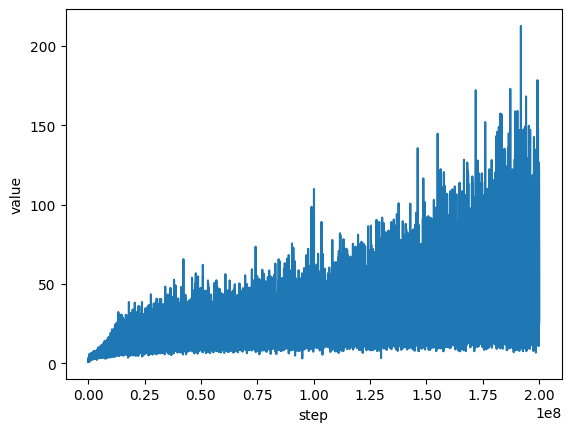

In [30]:
# plot the episode reward
sns.lineplot(data=ep_rew_df, x='step', y='value')

### DDPG

In [ ]:
log_dir = '/home/ikechukwuu/workspace/gcs/a2perf/quadruped_locomotion/dog_pace/ppo/0003/quadruped_locomotion_parallel_cores_50_seed_37_total_env_steps_200000000/policies/PPO1_1'


## System